In [1]:
%matplotlib inline

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
from kepcal.kepcal import KepCal
from kepcal.kernels import Matern32Kernel

In [4]:
Y = np.loadtxt("data/nearby_targets_8462852.txt").T
Y = Y[:50, :]
times, seasons = np.loadtxt("data/generaldata.txt", unpack=True)

kernel = Matern32Kernel(np.log(np.var(Y[0]/np.median(Y[0]))), np.log(300.0))
model = KepCal(times, seasons, Y, kernel=kernel)

In [5]:
model.initialize()

In [6]:
cost = model.train(niter=2000)

100%|██████████| 2000/2000 [02:18<00:00, 14.58it/s]


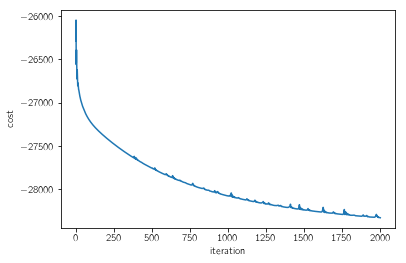

In [7]:
plt.plot(cost)
plt.xlabel("iteration")
plt.ylabel("cost")

In [8]:
Y_detrend, Y_err_detrend = model.calibrate()

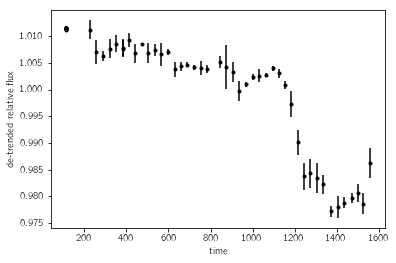

In [9]:
k = 0
plt.errorbar(times, Y_detrend[k], yerr=Y_err_detrend[k], fmt=".k", capsize=0)
plt.xlabel("time")
plt.ylabel("de-trended relative flux")